In [ ]:
!pip install -Uqq fastai

     |████████████████████████████████| 194kB 3.9MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 


In [ ]:
from fastai.vision.all import untar_data, URLs

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_154.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_133.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_59.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_28.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_105.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_56.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_137.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_145.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_15.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_155.jpg')...]

In [ ]:
from fastai.vision.all import re

In [ ]:
fname = (path/"images").ls()[0]
re.findall(r'(.+)_\d+.jpg$',fname.name)

['german_shorthaired']

In [ ]:
from fastai.vision.all import DataBlock, ImageBlock, CategoryBlock, RandomSplitter, get_image_files, using_attr,Resize, aug_transforms, RegexLabeller

In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'), 
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

In [ ]:
from fastai.vision.all import parent_label

In [ ]:
# Looking at fastai transforms
dblock1 = DataBlock(blocks=(ImageBlock, CategoryBlock),
                    get_y = parent_label,
                    item_tfms=Resize(460))

In [ ]:
path.cwd()/'images'

Path('/content/images')

In [ ]:
dls1 = dblock1.dataloaders([(path.cwd()/'cat.png')]*100,bs=8)

In [ ]:
x,y = dls1.valid.one_batch()

In [ ]:
x.shape, y.shape

((8, 3, 460, 460), (8,))

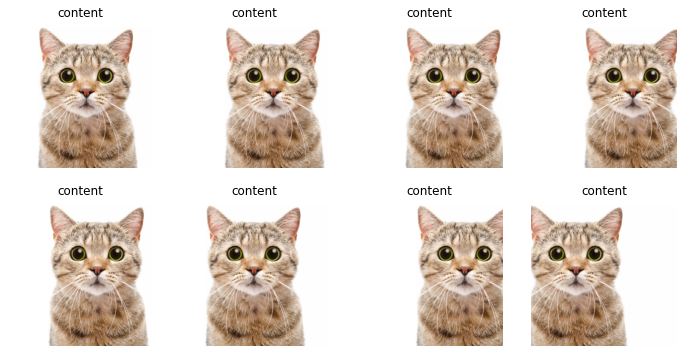

In [ ]:
dls1.show_batch()

In [ ]:
lambda: Inf.ones, dls.train.get_idxs

(<function __main__.<lambda>>,
 <bound method DataLoader.get_idxs of <fastai.data.core.TfmdDL object at 0x7f631fb8d588>>)

In [ ]:
from fastai.vision.all import subplots

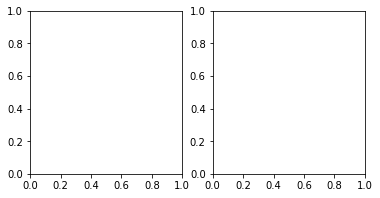

In [ ]:
_, axs = subplots(1,2)

In [ ]:
from fastai.vision.all import TensorImage

In [ ]:
x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=0.2, draw_y=0.2, p=1.)

TensorImage(x[0]) 


TensorImage([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.000

In [ ]:
x1[0]

TensorImage([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.6204, 0.5895, 0.5878,  ..., 1.0000, 1.0000, 1.0000],
         [0.6857, 0.6700, 0.6582,  ..., 1.0000, 1.0000, 1.0000],
         [0.7217, 0.7117, 0.7037,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.4833, 0.4498, 0.4472,  ..., 0.9961, 0.9961, 0.9961],
         [0.5508, 0.5340, 0.5234,  ..., 0.9961, 0.9961, 0.9961],
         [0.5940, 0.5837, 0.5768,  ..., 0.9961, 0.9961, 0.9961]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.000

In [ ]:
x1[0].show(ctx=axs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [ ]:
TensorImage(x1[0]).show(ctx=axs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [ ]:
from fastai.vision.all import setup_aug_tfms

In [ ]:
from fastai.vision.all import Rotate, Zoom, Warp

In [ ]:
tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224), Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])

In [ ]:
axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f631e1d3748>,
      dtype=object)

In [ ]:
from fastai.vision.all import Pipeline

In [ ]:
x = Pipeline(tfms)(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


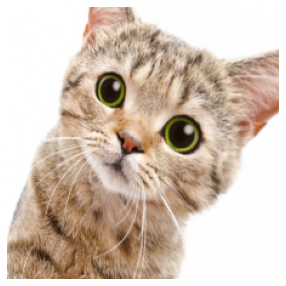

In [ ]:
TensorImage(x[0]).show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


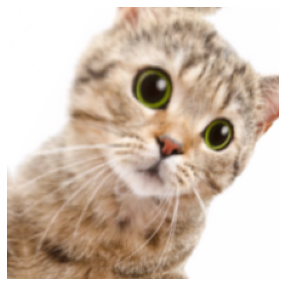

In [ ]:
TensorImage(x1[0]).show()

In [ ]:
# this happens if we dont resize our datablock

pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                  splitter=RandomSplitter(seed=42),
                  get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
try:
  pets1.summary(path/"images")
except Exception as e:
  print(e)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_97.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x334
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_97.jpg
    applying partial gives
      pomeranian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(28)

Final sample: (PILImage mode=RGB size=500x334, TensorCategory(28))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item

In [ ]:
from fastai.vision.all import cnn_learner, resnet34, error_rate

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.509931,0.356200,0.112991,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.485733,0.355915,0.113667,01:03
1,0.309003,0.270331,0.079161,01:03


In [ ]:
# wewillbe using cross entropy loss

# it consists of softmax 
# and log liklihood


# lets look at activvations and labels

x,y= dls.one_batch()

In [ ]:
y

TensorCategory([35, 34,  2, 18, 15,  5, 14,  3,  2, 33, 23, 13, 18, 28, 10,  8, 10,  9,
        23, 33, 30, 24,  4, 33, 13, 29, 34, 35, 20, 28, 34,  7, 25,  1, 32,  6,
        11,  7,  3, 34, 11, 31, 33, 24, 25,  8, 20, 13,  6, 28,  6, 36,  2, 31,
        30,  6, 20, 34, 33, 16, 27, 21,  4, 26], device='cuda:0')

In [ ]:
# predictions

preds, _ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.8883e-05, 7.2563e-06, 2.3878e-05, 6.7984e-06, 1.5277e-05, 1.7597e-06,
        2.8224e-05, 6.4036e-06, 6.3795e-06, 7.0833e-05, 1.1679e-05, 2.6725e-06,
        3.2517e-07, 3.3051e-07, 1.0533e-05, 3.4117e-06, 2.0575e-05, 3.6792e-07,
        5.0441e-04, 6.0278e-07, 1.6972e-06, 1.7009e-05, 1.4119e-05, 2.0645e-06,
        1.4348e-05, 1.0439e-03, 5.6816e-06, 1.5859e-04, 4.0469e-05, 5.6333e-06,
        7.4958e-05, 1.2652e-05, 1.5216e-03, 2.0265e-05, 2.8582e-07, 9.9632e-01,
        7.1664e-06])

In [ ]:
len(preds[0]), preds[0].sum()

(37, tensor(1.))

In [ ]:
from fastai.vision.all import torch

In [ ]:
torch.random.manual_seed(42)

In [ ]:
acts = torch.randn((6,2))
acts

tensor([[ 0.3367,  0.1288],
        [ 0.2345,  0.2303],
        [-1.1229, -0.1863],
        [ 2.2082, -0.6380],
        [ 0.4617,  0.2674],
        [ 0.5349,  0.8094]])

In [ ]:
acts = torch.randn((6,2))*2
acts

tensor([[ 2.2206, -3.3796],
        [-1.9779,  1.9159],
        [ 2.6443,  1.6344],
        [-1.5317, -1.5012],
        [ 2.7051,  1.3726],
        [-0.6555,  1.5899]])

In [ ]:
# wecan't take sigmoid of this directly
# as it won't add up to one

acts.sigmoid()

tensor([[0.9021, 0.0329],
        [0.1215, 0.8717],
        [0.9337, 0.8368],
        [0.1777, 0.1822],
        [0.9373, 0.7978],
        [0.3417, 0.8306]])

In [ ]:
acts[:,0]

tensor([ 2.2206, -1.9779,  2.6443, -1.5317,  2.7051, -0.6555])

In [ ]:
acts[:,1]

tensor([-3.3796,  1.9159,  1.6344, -1.5012,  1.3726,  1.5899])

In [ ]:
(acts[:,0] - acts[:,1]).sigmoid()

# here we are looking at the diffeerence between the two columns
# because therelative diffeerence will tell us how confident we are 
# of one being the prediction

tensor([0.9963, 0.0200, 0.7330, 0.4924, 0.7912, 0.0957])

In [ ]:
acts, acts[:,0]

(tensor([[ 2.2206, -3.3796],
         [-1.9779,  1.9159],
         [ 2.6443,  1.6344],
         [-1.5317, -1.5012],
         [ 2.7051,  1.3726],
         [-0.6555,  1.5899]]),
 tensor([ 2.2206, -1.9779,  2.6443, -1.5317,  2.7051, -0.6555]))

In [ ]:
# softmax does exactly that over all columns

sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.9963, 0.0037],
        [0.0200, 0.9800],
        [0.7330, 0.2670],
        [0.4924, 0.5076],
        [0.7912, 0.2088],
        [0.0957, 0.9043]])

In [ ]:
def softmax(x):
  return torch.exp(x)/ torch.exp(x).sum(dim=1, keepdim=True)

In [ ]:
from fastai.vision.all import plt

def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

Dimension out of range (expected to be in range of [-1, 0], but got 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  after removing the cwd from sys.path.


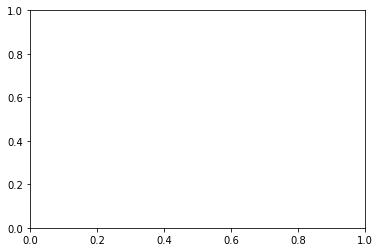

In [ ]:
try:
  plot_function(softmax, min=-4, max=4)
except Exception as e:
  print(e)

softmax() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (Tensor input, name dim, *, torch.dtype dtype)
 * (Tensor input, int dim, torch.dtype dtype)



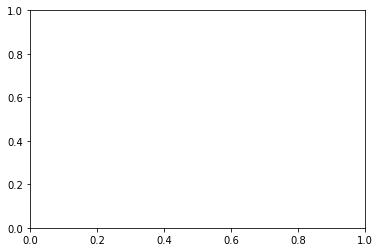

In [ ]:
try:
  plot_function(torch.softmax, min=-4, max=4)
except Exception as e:
  print(e)

In [ ]:
# using softmax in practice means that we will first use exponential to get all the positive vales
# then devide by the sumto ensure we have a bunch of numbers that add upto 1


#this was mnist loss

def mnist_loss(inputs, targets):
  inputs = inputs.sigmoid() # this will be replaced by softmax
  return torch.where(targets==1, 1-inputs, inputs).mean() # this by log liklihood

#  it actually becomes even easier, because (as we saw in the previous section) 
# we now have two columns, containing the equivalent of inputs and 1-inputs.

In [ ]:
from fastai.vision.all import tensor

In [ ]:
targ = tensor([0,1,0,1,1,0])

In [ ]:
sm_acts

tensor([[0.9963, 0.0037],
        [0.0200, 0.9800],
        [0.7330, 0.2670],
        [0.4924, 0.5076],
        [0.7912, 0.2088],
        [0.0957, 0.9043]])

In [ ]:
idx = range(6)
sm_acts[idx,targ] # we choose the value based on the target index

tensor([0.9963, 0.9800, 0.7330, 0.5076, 0.2088, 0.0957])

In [ ]:
import pandas as pd

In [ ]:
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['loss'] = sm_acts[range(6), targ]
#t = df.style.hide_index()
html = df.style._repr_html_().split('</style>')[1]
#html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

# we are onlytaking loss from the target value
# but here more the loss more the accuracy


,3,7,targ,idx,loss
0,0.996316,0.003684,0,0,0.996316
1,0.019960,0.980040,1,1,0.980040
2,0.732999,0.267001,0,2,0.732999
3,0.492392,0.507608,1,3,0.507608
4,0.791246,0.208754,1,4,0.208754
5,0.095742,0.904258,0,5,0.095742


In [ ]:
# we take the negative value
-sm_acts[idx, targ]

tensor([-0.9963, -0.9800, -0.7330, -0.5076, -0.2088, -0.0957])

In [ ]:
from fastai.vision.all import F

In [ ]:
F.nll_loss(sm_acts, targ,reduction='none')

#log liklihood is choosing the activatonbased on target

tensor([-0.9963, -0.9800, -0.7330, -0.5076, -0.2088, -0.0957])

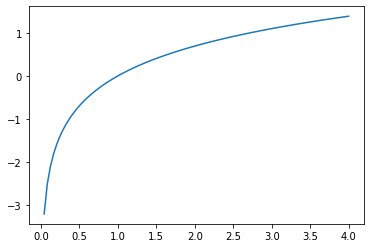

In [ ]:
# since probability is between 0 and 1
# our model won'tfind much difference between .999 and .99
# so we expand teh numbers ontp -infinity to infinity

plot_function(torch.log, min=0,max=4)

# logs are used when the underlying function increase exponentialy
# the function values cahnge linearly

In [ ]:
from fastai.vision.all import nn

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
loss_func(acts, targ)

tensor(0.8209)

### going through it again

*When* we first take the softmax, and then the log likelihood of that, that combination is called *cross-entropy loss*. In PyTorch, this is available as `nn.CrossEntropyLoss` (which, in practice, actually does `log_softmax` and then `nll_loss`):


In [ ]:
acts

tensor([[ 2.2206, -3.3796],
        [-1.9779,  1.9159],
        [ 2.6443,  1.6344],
        [-1.5317, -1.5012],
        [ 2.7051,  1.3726],
        [-0.6555,  1.5899]])

In [ ]:
targ

tensor([0, 1, 0, 1, 1, 0])

In [ ]:
acts[:,0] - acts[:,1]

tensor([ 5.6002, -3.8939,  1.0099, -0.0304,  1.3325, -2.2455])

In [ ]:
# sigmoid - (1 / (1 + np.exp(-x)))
(acts[:,0] - acts[:,1]).sigmoid() # this is what softmax does

tensor([0.9963, 0.0200, 0.7330, 0.4924, 0.7912, 0.0957])

In [ ]:
torch.softmax(acts, dim=1) # same asabove cell

tensor([[0.9963, 0.0037],
        [0.0200, 0.9800],
        [0.7330, 0.2670],
        [0.4924, 0.5076],
        [0.7912, 0.2088],
        [0.0957, 0.9043]])

In [ ]:
torch.log(torch.softmax(acts, dim=1))

tensor([[-3.6904e-03, -5.6039e+00],
        [-3.9140e+00, -2.0162e-02],
        [-3.1061e-01, -1.3205e+00],
        [-7.0848e-01, -6.7805e-01],
        [-2.3415e-01, -1.5666e+00],
        [-2.3461e+00, -1.0064e-01]])

In [ ]:
ls_acts = torch.log_softmax(acts, dim=1) # id ont know what ot give as second argument

In [ ]:
ls_acts # which is same as above

tensor([[-3.6903e-03, -5.6039e+00],
        [-3.9140e+00, -2.0162e-02],
        [-3.1061e-01, -1.3205e+00],
        [-7.0848e-01, -6.7805e-01],
        [-2.3415e-01, -1.5666e+00],
        [-2.3461e+00, -1.0064e-01]])

In [ ]:
-ls_acts[range(6),targ] # thisis log liklihood 

tensor([0.0037, 0.0202, 0.3106, 0.6780, 1.5666, 2.3461])

In [ ]:
nll_acts = F.nll_loss(ls_acts, targ, reduction="none")

In [ ]:
nll_acts

tensor([0.0037, 0.0202, 0.3106, 0.6780, 1.5666, 2.3461])

This entire thing though maybe wrong is handled by nn.CrossEntropyLoss

In [ ]:
F.cross_entropy(acts, targ)

tensor(0.8209)

In [ ]:
cloos = nn.CrossEntropyLoss()
cloos(acts, targ)

tensor(0.8209)

In [ ]:
F.cross_entropy(acts, targ, reduction="none") #same as above nll_acts


# so its actually verified!
# but what we do with these values
# they give the probability of it being the first number ?

tensor([0.0037, 0.0202, 0.3106, 0.6780, 1.5666, 2.3461])

In [ ]:
from fastai.vision.all import ClassificationInterpretation

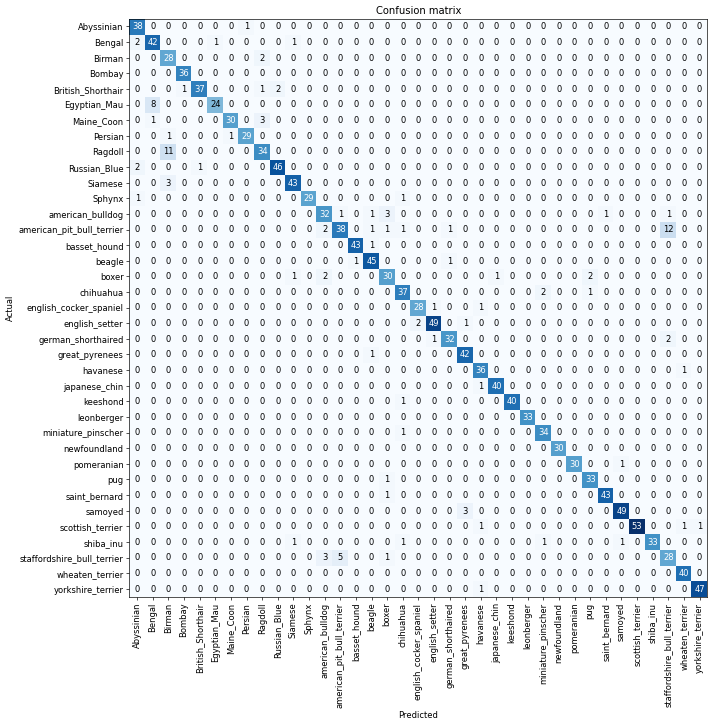

In [ ]:
# looking at model interpretation

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 12),
 ('Ragdoll', 'Birman', 11),
 ('Egyptian_Mau', 'Bengal', 8),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

In [ ]:
from fastai.vision.all import resnet18

In [ ]:
## imporving the model

## finding learnign rate optimum
# nlearn = cnn_learner(dls, resnet18, metrics=error_rate)
# nlearn.fine_tune(1, base_lr = 0.1)


## learnign rate is too high
# default is lr 1e-3

In [ ]:
# learn = cnn_learner(dls, resnet18, metrics=error_rate)
# lr_min, lt_steep = learn.lr_find()

In [ ]:
#print(f"Minimum/10: {lr_min:.2e}, steepest point: {lt_steep:.2e}")

In [ ]:
# learn = cnn_learner(dls, resnet18, metrics=error_rate)
# learn.fine_tune(2, base_lr=3e-3)

# so 3e -3 was taken before the steep fall

In [ ]:
# unfreezing and transfer learning
#learn.fine_tune??

In [ ]:
# learn.unfreeze()

In [ ]:
# out previous learning rate is not appropriate anymore as the rates have changed
# lr_min, lr_steep = learn.lr_find()

# we can take 1e-4

In [ ]:
# lr_min, lr_steep

In [ ]:
# learn.fit_one_cycle(6, lr_max=1e-4)

In [ ]:
# using discriminative learning rates

# learn = cnn_learner(dls, resnet18, metrics=[error_rate])
# learn.fit_one_cycle(3,3e-3)
# learn.unfreeze()
# learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

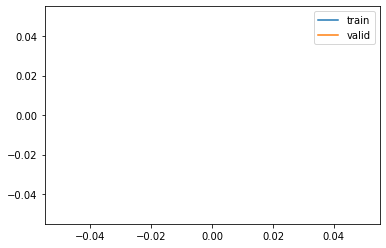

In [ ]:
learn.recorder.plot_loss() # to look at the training and validation loss

In [ ]:
# mixed precision training on nvidia gpu
# which helps in using th enumbers at half precision floating numbers

#from fastai.callback.fp16 import *
#learn = cnn_learner(dls, resnet18, metrics=error_rate).to_fp16()
#learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.766138,0.739128,0.217862,01:01
1,1.022392,0.382025,0.122463,01:01
2,0.607905,0.339736,0.104195,01:01


epoch,train_loss,valid_loss,error_rate,time
0,0.403243,0.294630,0.092693,01:03
1,0.368951,0.335199,0.094723,01:02
2,0.288167,0.305716,0.096076,01:02
3,0.208985,0.273297,0.085927,01:02
4,0.145374,0.252294,0.073748,01:03
5,0.117981,0.260948,0.077808,01:02


In [ ]:
from fastai.vision.all import L, test_eq, test_ne
t = L(range(12))
test_eq(t, list(range(12)))


In [ ]:
t.reverse()
t

(#12) [11,10,9,8,7,6,5,4,3,2...]

In [ ]:
t[3] = 'h'
t

(#12) [11,10,9,'h',7,6,5,4,3,2...]

In [ ]:
from fastai.vision.all import L

In [ ]:
a = ["right", "left", "middle" ]
a

['right', 'left', 'middle']

In [ ]:
osu =L(a)

In [ ]:
type(osu)

fastcore.foundation.L

In [ ]:
osu[0,1] = ("j", "k")

osu

(#3) ['j','k','middle']

In [ ]:
# path

from pathlib import Path

p=Path('.')

[x for x in p.iterdir() if x.is_dir()]

[Path('.config'), Path('sample_data')]

In [2]:
import numpy as np
np.log(-2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


nan